# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Tushar Sharma

Datum: 16.11.2023

Gruppe: 10

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Was ist der Wärmekapazität eines Wasserbehälter?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="setup_heat_capacity/heat_capacity_experiment_image.jpg" width="800">

Ich habe in transparent Behälter 250g kaltes Wasser und in schwarze Behälter 250g warmes Wasser . Ich habe Von beide die Temperatur gemessen und dann Wasser in schwarze Behälter voll in Transparent gekippt und dann die Änderung von Temperatur gemessen . 


## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path ='setup_heat_capacity/setup_heat_capacity.h5'
# DONE #

In [3]:
#Read out HDF file and all the data in it
with h5py.File(path) as f:
    dataset1 = f['RawData']['1ee7e430-1e33-61a4-864b-e8a8f617a28f']['temperature'][()]
    timestamp1 =f['RawData']['1ee7e430-1e33-61a4-864b-e8a8f617a28f']['timestamp'][()]
    dataset2 = f['RawData']['1ee7e433-83d9-666d-acc3-1f5300b8a1d8']['temperature'][()]
    timestamp2 = f['RawData']['1ee7e433-83d9-666d-acc3-1f5300b8a1d8']['timestamp'][()]
    


#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


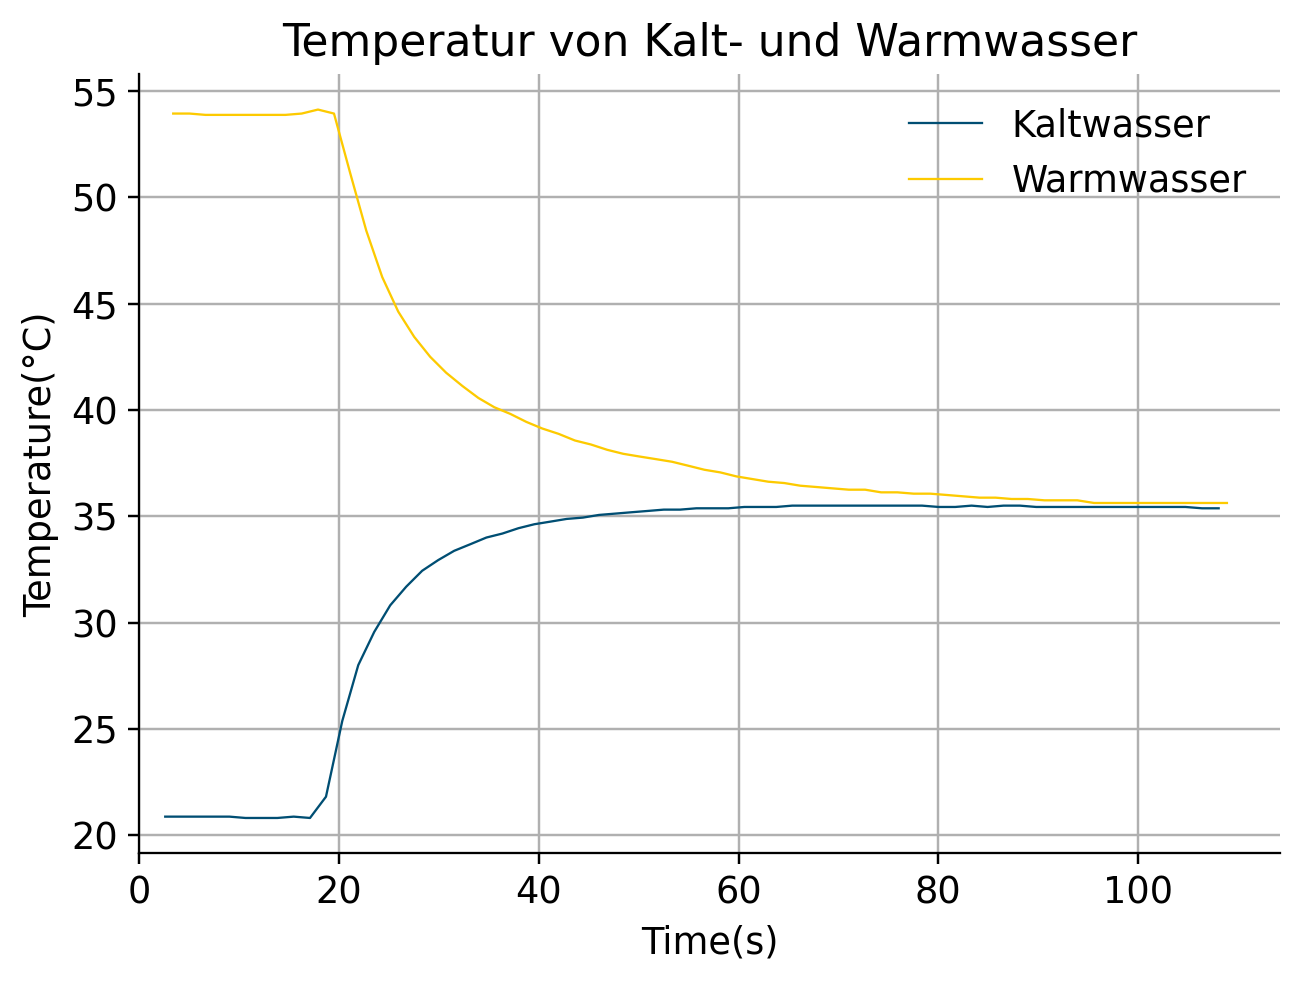

In [4]:
# TODO: Use the temperature and time data for plotting
plt.plot(timestamp1, dataset1, label = 'Kaltwasser')
plt.plot(timestamp2, dataset2, label = 'Warmwasser')
plt.xlabel('Time(s)')
plt.ylabel('Temperature(°C)')
plt.legend()
plt.grid(True)
plt.rcParams['axes.facecolor'] = '#f2f2f2'  # Background color
plt.rcParams['axes.edgecolor'] = 'black'     # Border color
plt.rcParams['grid.color'] = 'white' 
plt.title('Temperatur von Kalt- und Warmwasser')
plt.xlim(0)

#close the hdf file
f.close()

# DONE 

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [5]:
# Heat capacity of Water
water_heat_capa = 4.18
c_w = water_heat_capa

#mass of cold and hot water 
Warmwasser_masse = m_json.get_json_entry("datasheets", "1ee7f08a-a984-6e1b-944e-d875429359da", ["probe","Warmwasser masse"])
Kaltwasser_masse = m_json.get_json_entry("datasheets", "1ee7f08a-a984-6e1b-944e-d875429359da", ["probe","Kaltwasser masse"])

#assign correct variables and for caluculation
m_add = int(Warmwasser_masse)
m_cup = int(Kaltwasser_masse)

print(f"m_add is {m_add} g" )
print(f"m_cup is {m_cup} g")
print(f"c_w is {c_w} J/(g*K)")
# TODO: Read mass from the metadata of the experiment.


# DONE #

m_add is 250 g
m_cup is 250 g
c_w is 4.18 J/(g*K)


#### (iV) Anfangs- und Endwert der Temperatur

In [6]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity


# Access the datasets for sensor_1 and sensor_2
with h5py.File(path) as f:
 Warmwasser_temperature = f['RawData']['1ee7e433-83d9-666d-acc3-1f5300b8a1d8']['temperature'][(0)]
 Kaltwasser_temperature = f['RawData']['1ee7e430-1e33-61a4-864b-e8a8f617a28f']['temperature'][(0)]
 End_temperature = f['RawData']['1ee7e433-83d9-666d-acc3-1f5300b8a1d8']['temperature'][(-1)]

#assign correct variables and correct unit for calculation 
 T_2 = Warmwasser_temperature +273.15
 T_1 = Kaltwasser_temperature + 273.15
 T_M = End_temperature+273.15

 print(f"T_1 is {T_1} K")
 print(f"T_2 is {T_2} K")
 print(f"T_M is {T_M} K ")

#close hdf file
f.close()
# DONE #

T_1 is 294.025 K
T_2 is 327.0875 K
T_M is 308.775 K 


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [7]:
# TODO: Calculate heat capacity of the calorimeter
C = ((m_add * c_w * (T_2 - T_M))/(T_M-T_1)) - m_cup * c_w

# DONE #

#### (Vi) Ergebnis

In [8]:
# TODO: Print result

print(f"Heat capaciy is {C} J/K")
# DONE #

Heat capaciy is 252.39406779661022 J/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Ich bekomme ein wert von Wärmekapazität als 252.39 J/K . Diese wert kann sich unterscheiden da sich die Behälter Temperatur und Material nicht berücksichtigt wird . Und die Masse ist nicht genau , da die Masse ändert sich mit änderung der Temperatur . Aber die richtige wert soll in näherung von mein wert liegen.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Die Versuch hat mir geholfen zu verstehen wie die Temperatur sich ändert und am Ende sich ausgleicht , jedoch Messungen kann eine abweichung haben , die immer berücksichtigt werden soll.